In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
friday = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/Black_friday_sales/train_oSwQCTC/train.csv")
friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


- The dataset here is a purchase summary of various customers made in a retail company “ABC Private Limited” .
- The store wants to know better the customer purchase behaviour against different products.
- Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of -purchase) with the help of the information contained in the other variables.
- There are seven categorical variables to analyse. i.e Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


There is a null values in variable `Product_Category_2` and ` Product_Category_3`

In [10]:
friday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


We can impute mean value on the null values in the variables `Product_Category_2` and `Product_Category_3` that is 9.8 and 12.6 resp.

In [11]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(friday.iloc[:, 9:11].values)
friday.iloc[:,9:11] = imputer.transform(friday.iloc[:, 9:11].values)
friday.info() 

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Check Distribution of the target variable : ` Purchase`

Text(0.5, 1.0, 'Purchase Distribution')

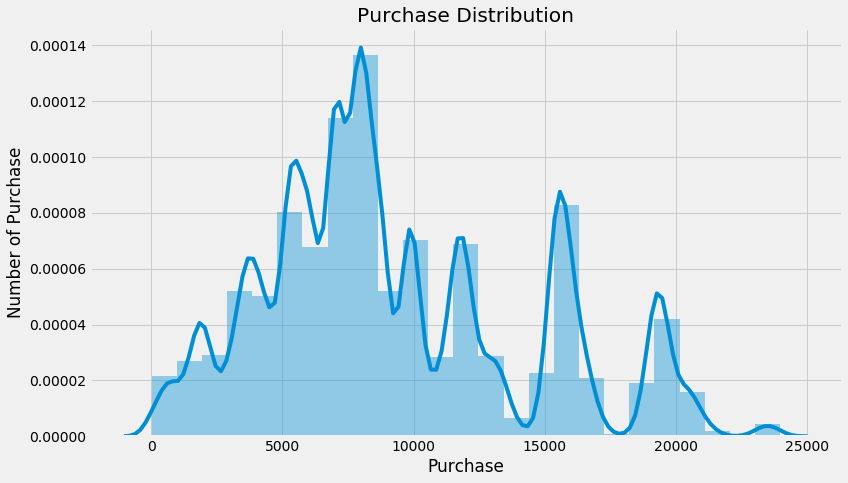

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sb.distplot(friday.Purchase, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Purchase")
plt.ylabel("Number of Purchase")
plt.title("Purchase Distribution")

In [13]:
# By making of Distribution Graph we can assume that there is some skewness in the item_Outlet_Sales
print ("Skew is:", friday.Purchase.skew())
print("Kurtosis: %f" % friday.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


The skewness in not much impact on the prediction of the purchase outcome.

### we can drop the column that intuitionally should not impact on the purchase outcome, i.e User_ID and Product ID

In [14]:
friday.drop(['User_ID','Product_ID'], axis=1,inplace=True)

In [15]:
friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


### In the dataset ther are some special characters (i.e '+') which need to be removed before applying machine learninig model in the variables name 'Age' and 'Stay_In_Current_City_Years'

In [17]:
friday['Age']=(friday['Age'].str.strip('+'))

In [18]:
friday['Stay_In_Current_City_Years']=(friday['Stay_In_Current_City_Years'].str.strip('+').astype(float))

In [19]:
friday.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057
4,M,55,16,C,4.0,0,8,9.842329,12.668243,7969


### Now we can perform Exploratory Data Analysis

In [21]:
friday.corr()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.030005,0.024280,-0.007618,-0.000317,0.007265,0.020833
Stay_In_Current_City_Years,0.030005,1.000000,-0.012819,-0.004213,-0.001368,0.001148,0.005422
Marital_Status,0.024280,-0.012819,1.000000,0.019888,0.012507,0.010695,-0.000463
Product_Category_1,-0.007618,-0.004213,0.019888,1.000000,0.373686,0.082711,-0.343703
Product_Category_2,-0.000317,-0.001368,0.012507,0.373686,1.000000,0.320195,-0.179309
Product_Category_3,0.007265,0.001148,0.010695,0.082711,0.320195,1.000000,-0.012261
Purchase,0.020833,0.005422,-0.000463,-0.343703,-0.179309,-0.012261,1.000000


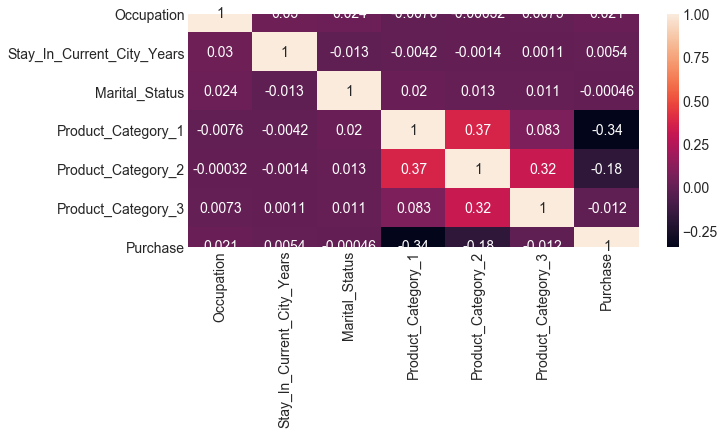

In [43]:
plt.figure(figsize=(9,4))
sb.heatmap(friday.corr(),annot=True)
           

From the above heatmap we can take the `3` most important features that can impact on the higher purchase from the customer.
That is:- 
`Occupation, Stay_In_Current_City_Years` and `Marital_Status`
- Increase in any of the value from the above three features is likely to result in a higher purchase from the customer.

`Impact of purchase on Occupation`

<Figure size 648x576 with 0 Axes>

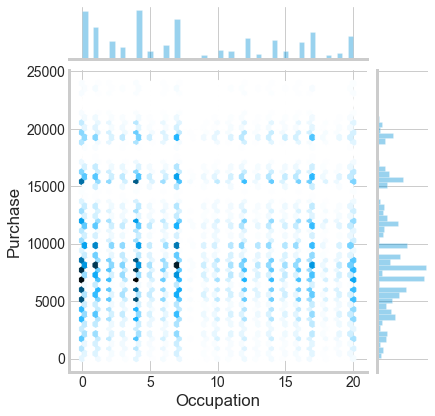

In [45]:
sb.set_style("whitegrid")
plt.figure(figsize=(9,8))

sb.jointplot(x='Occupation',y='Purchase',data=friday, kind='hex')

we can see from the above jointplot is that 
- the most of the purchase were done between 5000 to 10000.
- the occupation that leads to highest purchases, in this case the occupation would be 4 because that is closely enclosed in the range of 0 to 7

> One can imagine that the store can run targeted advertiements next time around to people with above listed occupations as they more likely to spend within the above purchase range.

` Impact of purchase on City_Category`

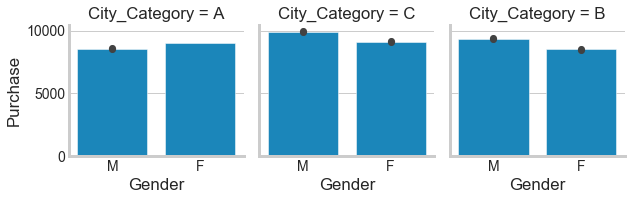

In [49]:
city = sb.FacetGrid(friday,col="City_Category")
city.map(sb.barplot, "Gender", "Purchase")

we can see from the above analysis is that:
- In the City_category C and City_category B male can purchase more than females but in city_category A shows female purchase more than males.
- City_category C shows the higher purchasing capacity as compare to other city categories.

> One can imagine that the store can run specials discounts on the city category A for the females to increase sales.

` Impact of purchase on Age`

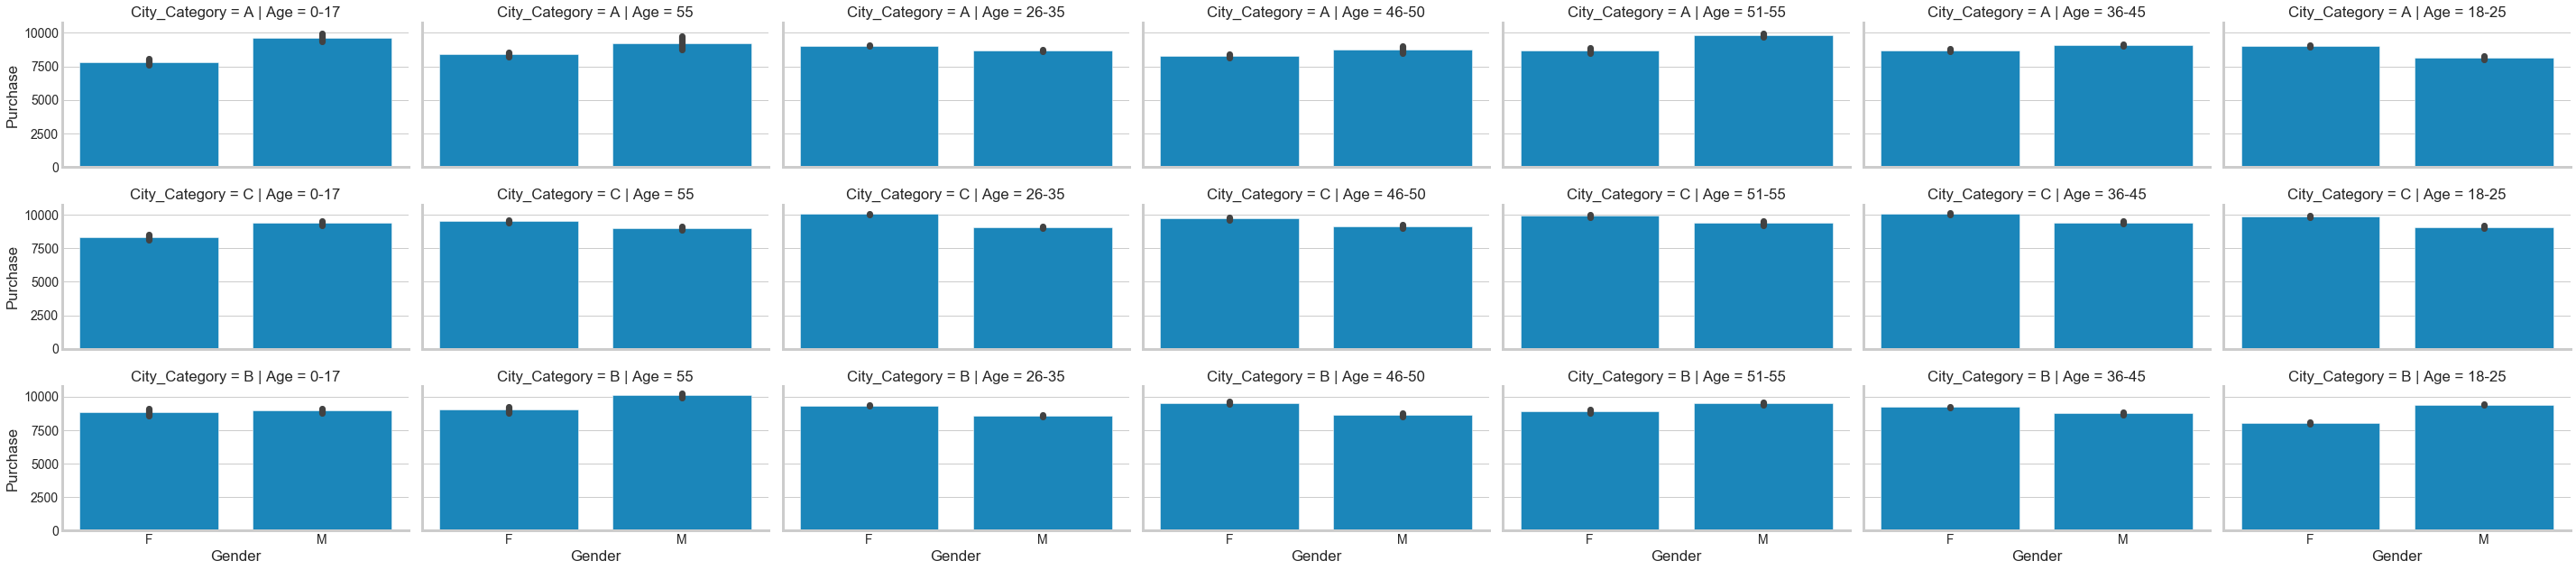

In [72]:
age = sb.FacetGrid(friday,col="Age",row="City_Category",aspect=1.9)
age.map(sb.barplot, "Gender", "Purchase")

The analysis shows that the :
- There are only three age groups that is 26-35, 36-45 and 51-55, whose have higher purchases.
- In City_category A and City_category B males tends to purchase more, IN City_category C Females tends to purchase more.

> One can Imagine that the store can run specials discounts to promote purchases for the above age groups and there resp. gender.

`Impact of Purchase on Marital_status`

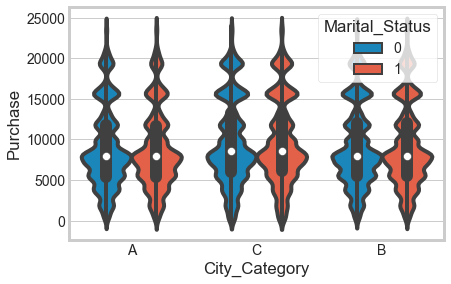

In [74]:
sb.violinplot(x="City_Category", y="Purchase", hue="Marital_Status", data=friday)

> One can imagine that only city_category C can only purchase more other that other city category

`Impact of Purchase on Product_Categories`

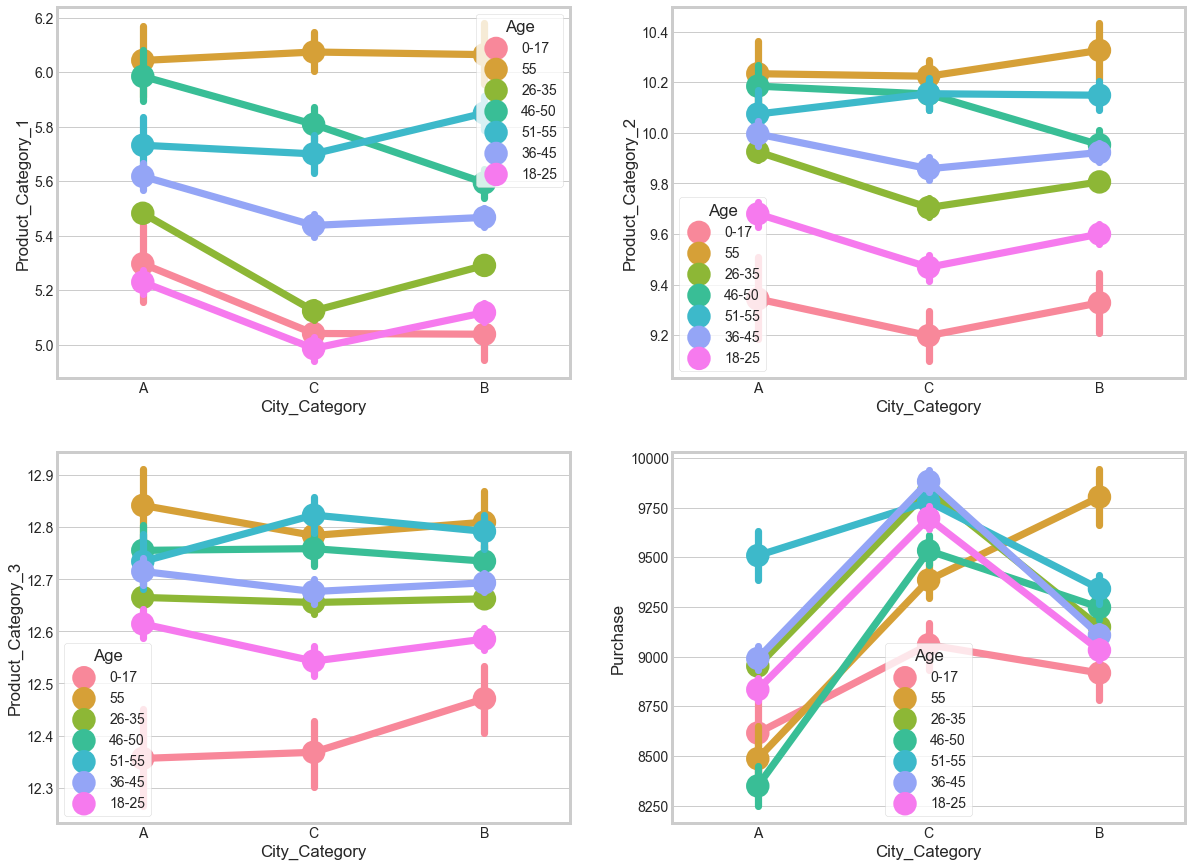

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sb.pointplot(y='Product_Category_1', x='City_Category',hue='Age',data=friday,ax=axes[0,0])
ax = sb.pointplot(y='Product_Category_2', x='City_Category',hue='Age',data=friday,ax=axes[0,1])
ax = sb.pointplot(y='Product_Category_3', x='City_Category', hue='Age',data=friday,ax=axes[1,0])
ax = sb.pointplot(y='Purchase', x='City_Category', hue='Age',data=friday,ax=axes[1,1])

> From the above analysis, Purchases of the each product_category across city_category for the age group 55 and above.It is higher in the city category B as compare to other age group.

### Data Pre-Processing 

we can combine the both train as well as test dataset, so that we can do data imputation and correction in both the file simultaneously.

In [78]:
train = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/Black_friday_sales/train_oSwQCTC/train.csv")
test = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/Black_friday_sales/test_HujdGe7/test.csv")

In [81]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'
    
data = pd.concat([train,test], ignore_index = True)
data.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/Black_friday_sales/data.csv",index=False)
print(train.shape, test.shape, data.shape)

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


(550068, 13) (233599, 12) (783667, 13)


In [82]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID,source
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001,train
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001,train
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001,train
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001,train
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002,train


In [83]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(data.iloc[:, 6:8].values)
data.iloc[:,6:8] = imputer.transform(data.iloc[:, 6:8].values)
data.info() 

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
source                        783667 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 77.7+ MB


In [84]:
data.drop(['User_ID','Product_ID'], axis=1,inplace=True)

In [85]:
data['Age']=(data['Age'].str.strip('+'))

In [86]:
data['Stay_In_Current_City_Years']=(data['Stay_In_Current_City_Years'].str.strip('+').astype(float))

In [87]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,source
0,0-17,A,F,0,10,3,9.844506,12.668605,8370.0,2.0,train
1,0-17,A,F,0,10,1,6.000000,14.000000,15200.0,2.0,train
2,0-17,A,F,0,10,12,9.844506,12.668605,1422.0,2.0,train
3,0-17,A,F,0,10,12,14.000000,12.668605,1057.0,2.0,train
4,55,C,M,0,16,8,9.844506,12.668605,7969.0,4.0,train


### Data Encoding for the City_Category column

In [89]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Age','City_Category','Gender'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 20 columns):
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null float64
source                        783667 non-null object
Age_0-17                      783667 non-null uint8
Age_18-25                     783667 non-null uint8
Age_26-35                     783667 non-null uint8
Age_36-45                     783667 non-null uint8
Age_46-50                     783667 non-null uint8
Age_51-55                     783667 non-null uint8
Age_55                        783667 non-null uint8
City_Category_A               783667 non-null uint8
City_Category_B               783667 non-null ui

In [90]:
data.head()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,source,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55,City_Category_A,City_Category_B,City_Category_C,Gender_F,Gender_M
0,0,10,3,9.844506,12.668605,8370.0,2.0,train,1,0,0,0,0,0,0,1,0,0,1,0
1,0,10,1,6.000000,14.000000,15200.0,2.0,train,1,0,0,0,0,0,0,1,0,0,1,0
2,0,10,12,9.844506,12.668605,1422.0,2.0,train,1,0,0,0,0,0,0,1,0,0,1,0
3,0,10,12,14.000000,12.668605,1057.0,2.0,train,1,0,0,0,0,0,0,1,0,0,1,0
4,0,16,8,9.844506,12.668605,7969.0,4.0,train,0,0,0,0,0,0,1,0,0,1,0,1


## Exporting Data

In [92]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Purchase','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/Black_friday_sales/train_modified.csv",index=False)
test.to_csv("C:/Users/Aakash Sharma/Desktop/Projects/Black_friday_sales/test_modified.csv",index=False)

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Model, Predict and Solve the problem

In [54]:
import pandas as pd
import numpy as np
train_new = pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/Black_friday_sales/train_modified.csv")
test_new= pd.read_csv("C:/Users/Aakash Sharma/Desktop/Projects/Black_friday_sales/test_modified.csv")

In [55]:
train_new.head()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55,City_Category_A,City_Category_B,City_Category_C,Gender_F,Gender_M
0,0,10,3,9.844506,12.668605,8370.0,2.0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,10,1,6.000000,14.000000,15200.0,2.0,1,0,0,0,0,0,0,1,0,0,1,0
2,0,10,12,9.844506,12.668605,1422.0,2.0,1,0,0,0,0,0,0,1,0,0,1,0
3,0,10,12,14.000000,12.668605,1057.0,2.0,1,0,0,0,0,0,0,1,0,0,1,0
4,0,16,8,9.844506,12.668605,7969.0,4.0,0,0,0,0,0,0,1,0,0,1,0,1


In [56]:
test_new.head()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55,City_Category_A,City_Category_B,City_Category_C,Gender_F,Gender_M
0,1,7,1,11.0,12.668605,2.0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,17,3,5.0,12.668605,0.0,0,0,1,0,0,0,0,0,0,1,0,1
2,1,1,5,14.0,12.668605,4.0,0,0,0,1,0,0,0,0,1,0,1,0
3,1,1,4,9.0,12.668605,4.0,0,0,0,1,0,0,0,0,1,0,1,0
4,0,1,4,5.0,12.000000,1.0,0,0,1,0,0,0,0,0,0,1,1,0


In [57]:
#Dividing the data into test and train datasets
X = train_new.drop(['Purchase'],axis=1)
y = train_new.Purchase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
'''# Feature Scaling of training and test set
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)'''

In [58]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor

In [66]:
xgb=XGBRegressor( objective='reg:squarederror', max_depth=6, learning_rate=0.1, n_estimators=700, booster = 'gbtree', n_jobs = -1,random_state = 0)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE =', rmse)
print('R2 =', r2)

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE = 2854.4801938093665
R2 = 0.6773308992787004


In [ ]:
'''# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)'''

In [ ]:
'''for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    '''

Fitting the model with the best number of n_estimators, to avoid underfitting and overfitting.

In [ ]:
'''regressor = RandomForestRegressor(n_estimators=700, random_state=123)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE =', rmse)
print('R2 =', r2)'''

Lets us see what our prdicted results look like.

In [67]:
y_pred

array([12506.171 ,  1293.7045, 15292.859 , ..., 13864.05  , 14577.741 ,
       14834.366 ], dtype=float32)

## Predict the purchase of the test set

In [68]:
#Predict training set:
predictors = train_new.columns.drop(['Purchase'])
train_new_predictions = xgb.predict(train_new[predictors])
target = 'Purchase'

In [69]:
# make predictions using actual model
test_new[target] = xgb.predict(test_new[predictors])
test_new[target].to_csv("C:/Users/Aakash Sharma/Desktop/Projects/Black_friday_sales/sample_purchase.csv")
test_new[target]

C:\Users\Aakash Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


0         15195.285156
1         10822.008789
2          6695.587402
3          2719.610840
4          2675.687500
              ...     
233594     7128.843750
233595     6196.211426
233596    12931.266602
233597    19978.142578
233598     1744.518677
Name: Purchase, Length: 233599, dtype: float32